In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
params = np.array([rho_b_I,rho_h_I,alpha_h_I,a_h_I,beta_h_I,R_d_I,Sigma_d_SD_I,Sigma_g_ISM_I])

In [3]:
def Vc_Model_I(R,parameter,rho_h=rho_h_I,rho_b=rho_b_I,alpha_h=alpha_h_I,a_h=a_h_I,beta_h=beta_h_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    R_d = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [4]:
R = np.linspace(0.,15.,100)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


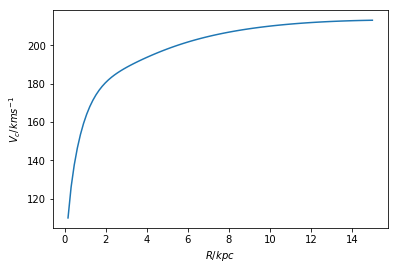

In [5]:
plt.plot(R,Vc_Model_I(R,R_d_I))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [6]:
#10.3, 15.3, 7.7from the paper
#11.10,12.24,7.25 orginally
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=220.# local circular velocity (km/s)
UsunINUSE=10.3#11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=15.3#12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.7#07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [7]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [8]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [9]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  220.0  km/s
 (Usun,Vsun,Wsun) = ( 10.3 , 15.3 , 7.7 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                           0
 use C stars?                           0
 use masers?                            0
 use astropy?                           0


In [10]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [11]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [12]:
print min(vecvRp),max(vecvRp),min(vecRp),max(vecRp)

128.218523307317 386.01829276368164 3.4805916598031352 17.55446098248422


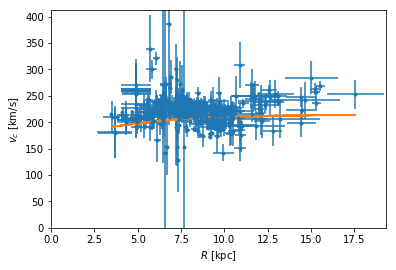

In [13]:
fig, ax1 = plt.subplots()
ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='.')
ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
ax1.set_xlabel('$R$ [kpc]')
ax1.set_ylabel('$v_c$ [km/s]')
plt.plot(vecRp,Vc_Model_I(vecRp,R_d_I))
plt.show()

# $R_{d}$

In [22]:
def Xi2_R_d(parameters):
    R_d = parameters
    model = Vc_Model_I(vecRp,parameters)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [23]:
print Xi2_R_d(R_d_I),R_d_I

7142.2492346595245 2.0


In [24]:
print Xi2_R_d(2.42)#Minimum by hand

2550.3701007680634


In [25]:
print Xi2_R_d(2.41)#Minimum by hand

2549.923631125796


In [26]:
from scipy.optimize import minimize

In [27]:
x0_R_d = np.array(1.0)

In [28]:
LS = minimize(Xi2_R_d,x0_R_d,method='L-BFGS-B',bounds=((1.0,4.),))#,bounds=((np.log(1.0e8),np.log(9.0e8))))#,'eps':0.1)

In [29]:
print LS

      fun: 2549.5253416451483
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 7
   status: 0
  success: True
        x: array([2.41406777])


In [30]:
L2 = minimize(Xi2,x0, method='TNC',bounds=((1.0, 4.),))

In [31]:
print L2

     fun: 2549.525341645149
     jac: array([-0.00013642])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 16
     nit: 6
  status: 1
 success: True
       x: array([2.41406777])


In [32]:
from scipy.optimize import minimize_scalar

In [33]:
res = minimize_scalar(Xi2, bounds=(1.0, 4.0), method='bounded')
print res

     fun: 2549.5253416474015
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 2.4140680795910034


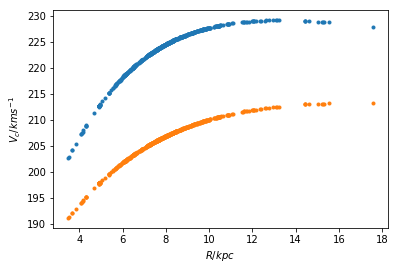

In [135]:
#fig, ax1 = plt.subplots()
#ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='.')
#ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
#ax1.set_xlabel('$R$ [kpc]')
#ax1.set_ylabel('$v_c$ [km/s]')
plt.plot(vecRp,Vc_Model_I(vecRp,np.asscalar(LS.x)),'.')
plt.plot(vecRp,Vc_Model_I(vecRp,R_d_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

# $\Sigma_{d}$_SD (escala logaritmica)

In [35]:
def Vc_Model_I_v1(R,parameter,rho_h=rho_h_I,rho_b=rho_b_I,alpha_h=alpha_h_I,a_h=a_h_I,beta_h=beta_h_I,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I):
    Sigma_d_SD = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


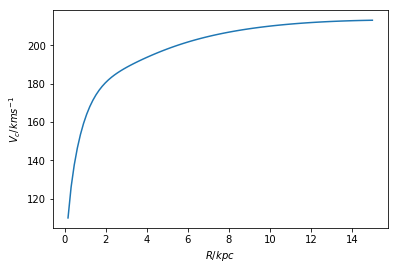

In [136]:
plt.plot(R,Vc_Model_I_v1(R,Sigma_d_SD_I))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [39]:
def Xi2_v1(parameters):
    Sigma_d_SD = np.exp(parameters)
    model = Vc_Model_I_v1(vecRp,Sigma_d_SD)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [40]:
print Xi2_v1(np.log(Sigma_d_SD_I)),Sigma_d_SD_I

7142.249234659547 1428750000.0


In [41]:
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
print Sigma_d_SD_II

402000000.0


In [43]:
print Xi2_v1(np.log(2.0e9)),Xi2_v1(np.log(0.1e9))#Minumum by hand

2199.814430509383 68363.32079711507


In [44]:
x0_v1=np.array(np.log(0.15e9))
LS_v1 = minimize(Xi2_v1,x0_v1,method='L-BFGS-B',bounds=((np.log(0.15e9),np.log(3.0e9)),))
print LS_v1

      fun: 2192.9628971014863
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 22
      nit: 5
   status: 0
  success: True
        x: array([21.42785913])


In [45]:
print np.log(2.0e9),np.exp(LS_v1.x)

21.416413017506358 [2.02302373e+09]


In [48]:
L2_v1 = minimize(Xi2_v1,x0_v1, method='TNC',bounds=((np.log(0.15e9),np.log(3.0e9)),))

In [49]:
print L2_v1

     fun: 2192.962897101486
     jac: array([9.09494702e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 12
     nit: 4
  status: 1
 success: True
       x: array([21.42785913])


In [50]:
res_v1 = minimize_scalar(Xi2_v1, bounds=(np.log(0.15e9),np.log(3.0e9)), method='bounded')
print res_v1

     fun: 2192.9628971144293
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 21.427858635781224


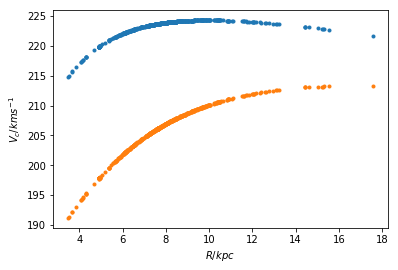

In [137]:
plt.plot(vecRp,Vc_Model_I_v1(vecRp,np.asscalar(np.exp(LS_v1.x))),'.')
plt.plot(vecRp,Vc_Model_I_v1(vecRp,Sigma_d_SD_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

# $a_{h}$

In [52]:
def Vc_Model_I_v2(R,parameter,rho_h=rho_h_I,rho_b=rho_b_I,alpha_h=alpha_h_I,beta_h=beta_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    a_h = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [53]:
def Xi2_v2(parameters):
    a_h = parameters
    model = Vc_Model_I_v2(vecRp,a_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [56]:
print Xi2_v2(5.7)#Minimum by hand,Xi2_v2(1.9)

4327.071871507979


In [55]:
x0_v2 = np.array(1.0)
LS_v2 = minimize(Xi2_v2,x0_v2,method='L-BFGS-B',bounds=((1.0,9.),))
print LS_v2

      fun: 4326.81410172091
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 6
   status: 0
  success: True
        x: array([5.72576808])


In [57]:
L2_v2 = minimize(Xi2_v2,x0_v2, method='TNC',bounds=((1.0,9.),))
print L2_v2

     fun: 4326.81410172238
     jac: array([0.00127329])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 39
     nit: 7
  status: 1
 success: True
       x: array([5.72577015])


In [58]:
res_v2 = minimize_scalar(Xi2_v2, bounds=(1.0,9.), method='bounded')
print res_v2

     fun: 4326.814101720905
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 5.725768170265817


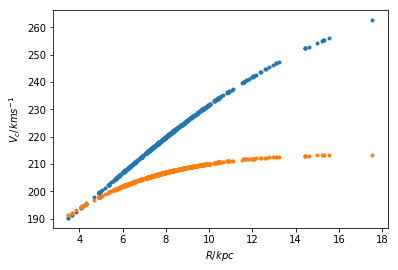

In [138]:
plt.plot(vecRp,Vc_Model_I_v2(vecRp,np.asscalar(LS_v2.x)),'.')
plt.plot(vecRp,Vc_Model_I_v2(vecRp,a_h_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

# $\rho_{b}$(Escala logaritmica)

In [60]:
def Vc_Model_I_rho_b(R,parameter,rho_h=rho_h_I,a_h=a_h_I,alpha_h=alpha_h_I,beta_h=beta_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    rho_b = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


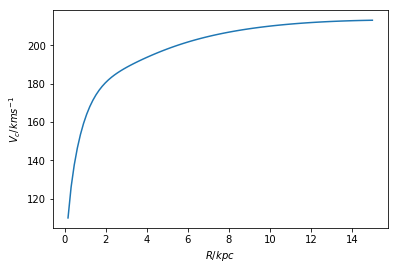

In [139]:
plt.plot(R,Vc_Model_I_rho_b(R,rho_b_I))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [62]:
def Xi2_rho_b(parameters):
    rho_b = np.exp(parameters)
    model = Vc_Model_I_rho_b(vecRp,rho_b)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [64]:
print Xi2_rho_b(np.log(rho_b_I))

7142.249234659521


In [70]:
print Xi2_rho_b(np.log(1.4e9))#minimum by hand

2237.1624738508217


In [71]:
x0_rho_b = np.array(np.log(1.0e8))
LS_rho_b = minimize(Xi2_rho_b,x0_rho_b,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(30.0e8)),))
print LS_rho_b

      fun: 2231.739825478736
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00209184])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 3
   status: 0
  success: True
        x: array([21.08442894])


In [73]:
L2_rho_b = minimize(Xi2_rho_b,x0_rho_b, method='TNC',bounds=((np.log(1.0e8),np.log(30.0e8)),))
print L2_rho_b

     fun: 2231.739825478606
     jac: array([0.])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 12
     nit: 4
  status: 1
 success: True
       x: array([21.08442905])


In [74]:
res_rho_b = minimize_scalar(Xi2_rho_b, bounds=(np.log(1.0e8),np.log(30.0e8)), method='bounded')
print res_rho_b

     fun: 2231.739825479048
 message: 'Solution found.'
    nfev: 13
  status: 0
 success: True
       x: 21.084429276794356


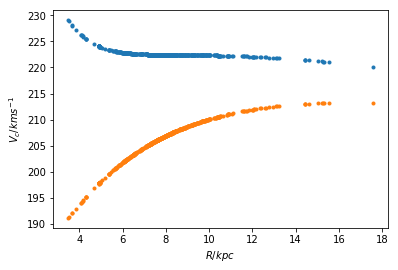

In [140]:
plt.plot(vecRp,Vc_Model_I_rho_b(vecRp,np.asscalar(np.exp(LS_rho_b.x))),'.')
plt.plot(vecRp,Vc_Model_I_rho_b(vecRp,rho_b_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

# $\rho_{h}$

In [78]:
def Vc_Model_I_rho_h(R,parameter,a_h=a_h_I,rho_b=rho_b_I,alpha_h=alpha_h_I,beta_h=beta_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    rho_h = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


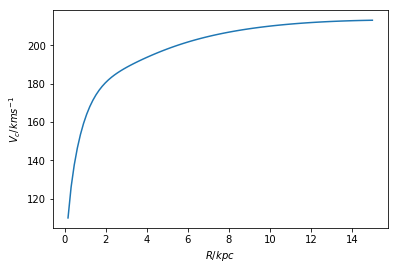

In [141]:
plt.plot(R,Vc_Model_I_rho_h(R,rho_h_I))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [85]:
def Xi2_rho_h(parameters):
    rho_h = np.exp(parameters)
    model = Vc_Model_I_rho_h(vecRp,rho_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [86]:
print Xi2_rho_h(np.log(rho_h_I))

7142.249234659534


In [93]:
print Xi2_rho_h(np.log(1.0e9))#Minimum by hand

3100.751249727333


In [94]:
x0_rho_h = np.array(np.log(1.0e8))
LS_rho_h = minimize(Xi2_rho_h,x0_rho_h,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print LS_rho_h

      fun: 3075.7663999749757
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00031832])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 3
   status: 0
  success: True
        x: array([20.74849522])


In [95]:
L2_rho_h = minimize(Xi2_rho_h,x0_rho_h, method='TNC',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print L2_rho_h

     fun: 3075.766399974974
     jac: array([-4.54747351e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 20
     nit: 5
  status: 1
 success: True
       x: array([20.74849523])


In [96]:
res_rho_h = minimize_scalar(Xi2_rho_h, bounds=(np.log(1.0e8),np.log(20.0e8)), method='bounded')
print res_rho_h

     fun: 3075.7664000574055
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 20.748496667118438


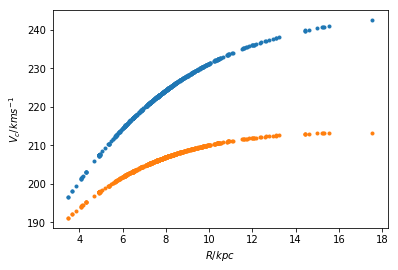

In [144]:
plt.plot(vecRp,Vc_Model_I_rho_h(vecRp,np.asscalar(np.exp(LS_rho_h.x))),'.')
plt.plot(vecRp,Vc_Model_I_rho_h(vecRp,rho_h_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

# $\alpha_{h}$

In [101]:
def Vc_Model_I_alpha_h(R,parameter,a_h=a_h_I,rho_b=rho_b_I,rho_h=rho_h_I,beta_h=beta_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    alpha_h = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


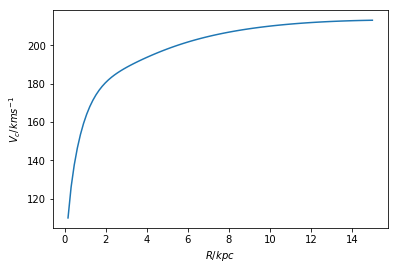

In [145]:
plt.plot(R,Vc_Model_I_alpha_h(R,alpha_h_I))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

In [103]:
def Xi2_alpha_h(parameters):
    alpha_h = parameters
    model = Vc_Model_I_alpha_h(vecRp,alpha_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [104]:
print Xi2_alpha_h(alpha_h_I)

7142.2492346595245


In [108]:
print Xi2_alpha_h(-5.)

40697.65347511433


In [107]:
x0_alpha_h = np.array(-3.)
LS_alpha_h = minimize(Xi2_alpha_h,x0_alpha_h,method='L-BFGS-B',bounds=((-3.,3.),))
print LS_alpha_h

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


      fun: 2628.255219926935
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 5
   status: 0
  success: True
        x: array([-1.32520519])


In [109]:
L2_alpha_h = minimize(Xi2_alpha_h,x0_alpha_h, method='TNC',bounds=((-3.,3),))
print L2_alpha_h

     fun: 2628.2552199278934
     jac: array([-0.00727596])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 20
     nit: 6
  status: 1
 success: True
       x: array([-1.32520545])


In [110]:
res_rho_h = minimize_scalar(Xi2_alpha_h, bounds=(-3.,3.), method='bounded')
print res_rho_h

     fun: 2628.2552199574393
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: -1.3252037052225722


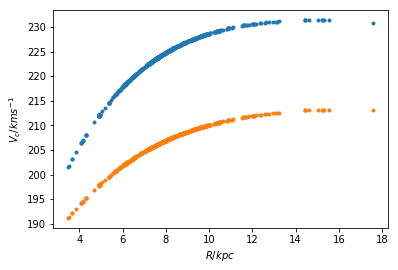

In [146]:
plt.plot(vecRp,Vc_Model_I_alpha_h(vecRp,np.asscalar(LS_alpha_h.x)),'.')
plt.plot(vecRp,Vc_Model_I_alpha_h(vecRp,alpha_h_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

# $\beta_{h}$

In [112]:
def Vc_Model_I_beta_h(R,parameter,a_h=a_h_I,rho_b=rho_b_I,alpha_h=alpha_h_I,rho_h=rho_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I):
    beta_h = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


Text(0,0.5,'$V_{c}/km s^{-1}$')

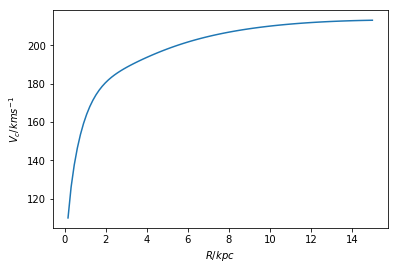

In [147]:
plt.plot(R,Vc_Model_I_beta_h(R,beta_h_I))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')

In [114]:
def Xi2_beta_h(parameters):
    beta_h = parameters
    model = Vc_Model_I_beta_h(vecRp,beta_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [116]:
print Xi2_beta_h(beta_h_I)

7142.2492346595245


In [117]:
x0_beta_h = np.array(1.)
LS_beta_h = minimize(Xi2_beta_h,x0_beta_h,method='L-BFGS-B',bounds=((1.,3.),))
print LS_beta_h

      fun: 3519.417321043772
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00022737])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 7
   status: 0
  success: True
        x: array([2.57692347])


In [118]:
L2_beta_h = minimize(Xi2_beta_h,x0_beta_h, method='TNC',bounds=((1.,3.),))
print L2_beta_h

     fun: 3519.417321043771
     jac: array([9.09494702e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 22
     nit: 7
  status: 1
 success: True
       x: array([2.57692346])


In [119]:
res_beta_h = minimize_scalar(Xi2_beta_h, bounds=(1.,3.), method='bounded')
print res_beta_h

     fun: 3519.417321045905
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 2.5769232119133694


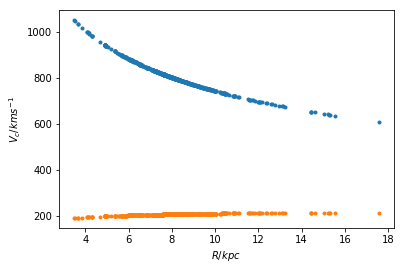

In [148]:
plt.plot(vecRp,Vc_Model_I_alpha_h(vecRp,np.asscalar(LS_beta_h.x)),'.')
plt.plot(vecRp,Vc_Model_I_alpha_h(vecRp,alpha_h_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()

# $\Sigma_{g}$ISM (Escala logaritmica)

In [121]:
def Vc_Model_I_Sigma_g_ISM(R,parameter,a_h=a_h_I,rho_b=rho_b_I,alpha_h=alpha_h_I,beta_h=beta_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,rho_h=rho_h_I):
    Sigma_g_ISM = parameter
    def Vc_b(R):
        def I_b(x,R):
            e = np.sqrt(1. - q_b**2.)
            n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
            d = np.sqrt(1.-x**2.*e**2.)
            t = R**2.*(R/a_b)**(-alpha_b)
            return (t*n)/d
        Integral_b = []
        for i in range (0,len(R)):
            result = integrate.quad(I_b,0,1,args=(R[i]))[0]
            Integral_b.append(result)
        return np.array(Integral_b)
    def Vc_DM(R):
        def I_h(x,R):
            e = np.sqrt(1.- q_h**2.)
            n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
            d = np.sqrt(1-x**2.*e**2)
            t = R**2.*(R/a_h)**(-alpha_h)
            result = (t*n)/d
            return result
        Integral_DM = []
        for i in range (0,len(R)):
            result = integrate.quad(I_h,0,1,args=(R[i]))[0]
            Integral_DM.append(result)
        return np.array(Integral_DM)
    def V2_c_SD(R):
        result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
        return result
    def Vc_ISM(R):
        def M_g_ISM(u,R):
            return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
        Integral_M_g = []
        for i in range (0,len(R)):
            result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
            Integral_M_g.append(result)
        return np.array(Integral_M_g)
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


Text(0,0.5,'$V_{c}/km s^{-1}$')

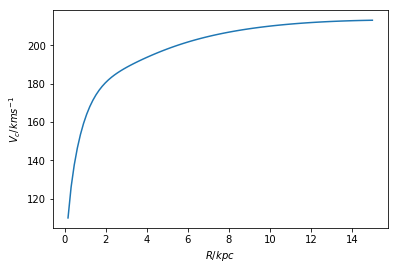

In [149]:
plt.plot(R,Vc_Model_I_Sigma_g_ISM(R,Sigma_g_ISM_I))
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')

In [123]:
def Xi2_Sigma_g_ISM(parameters):
    Sigma_g_ISM = np.exp(parameters)
    model = Vc_Model_I_Sigma_g_ISM(vecRp,Sigma_g_ISM)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [126]:
print Xi2_Sigma_g_ISM(np.log(Sigma_g_ISM_I))

7142.249234659513


In [128]:
print np.exp(20.85106678)

1136326786.4426143


In [127]:
x0_Sigma_g = np.array(np.log(1.0e8))
LS_Sigma_g = minimize(Xi2_Sigma_g_ISM,x0_Sigma_g,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print LS_Sigma_g

      fun: 2767.249963572813
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 22
      nit: 5
   status: 0
  success: True
        x: array([20.85106678])


In [129]:
L2_Sigma_g = minimize(Xi2_Sigma_g_ISM,x0_Sigma_g, method='TNC',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print L2_Sigma_g

     fun: 2767.249963572858
     jac: array([-0.00140972])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 25
     nit: 5
  status: 1
 success: True
       x: array([20.85106672])


In [130]:
res_Sigma_g = minimize_scalar(Xi2_Sigma_g_ISM, bounds=(np.log(1.0e8),np.log(20.0e8)), method='bounded')
print res_Sigma_g

     fun: 2767.2499635728136
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 20.851066791255416


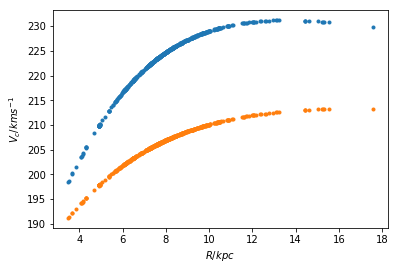

In [150]:
plt.plot(vecRp,Vc_Model_I_Sigma_g_ISM(vecRp,np.asscalar(np.exp(LS_Sigma_g.x))),'.')
plt.plot(vecRp,Vc_Model_I_Sigma_g_ISM(vecRp,Sigma_g_ISM_I),'.')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.show()